In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#charger votre base de données
dataset=pd.read_csv("Modified_Hand_Gesture_Recognition_Dataset.csv")
data=dataset.iloc[:,:-2].values
target=dataset.iloc[:,-2].values

In [4]:
data_train,data_test,target_train,target_test=train_test_split(data,target,test_size=0.3)

In [5]:
sc=StandardScaler()
sc.fit(data_train)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
data_train_std=sc.transform(data_train)
data_test_std=sc.transform(data_test)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=0)
ppn.fit(data_train_std,target_train)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
target_pred=ppn.predict(data_test_std)

In [9]:
df=pd.DataFrame({"actual":target_test,"predicted":target_pred})

In [10]:
df

,actual,predicted
0,0,0
1,5,5
2,2,2
3,3,5
4,4,4
5,0,1
6,1,1
7,2,2
8,0,0
9,1,1


In [11]:
print("Accuracy:%.2f"%accuracy_score(target_test,target_pred))

Accuracy:0.93


In [12]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(100),solver="sgd",learning_rate_init=0.01,max_iter=500)
mlp.fit(data_train,target_train)
print(mlp.score(data_test,target_test))

0.37777777777777777


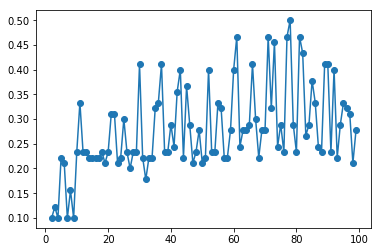

In [13]:
hiddenLayer=[]
for k in range(2,100):
    mlp=MLPClassifier(hidden_layer_sizes=(k),solver="sgd",learning_rate_init=0.01,max_iter=500)
    mlp.fit(data_train,target_train)
    hiddenLayer.append(mlp.score(data_test,target_test))
plt.plot(range(2,100),hiddenLayer,'o-')
plt.show()